### Introduction to classification
- install imblearn
- make neccessary imports
- import data
- check shape of the data
- get the info


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

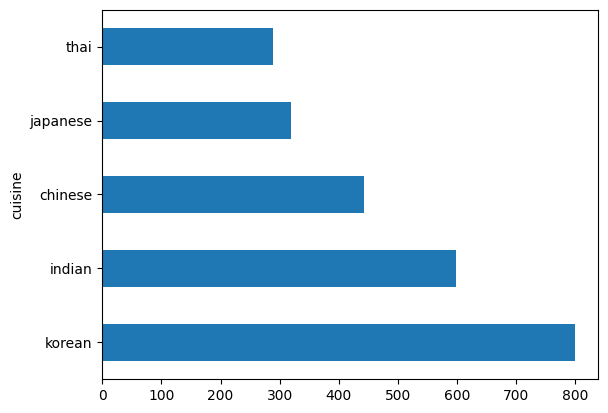

In [ ]:
#plot the cuisune in bars using barh
df['cuisine'].value_counts().plot(kind='barh')


In [27]:
#find out how many data are in each cuisine and print it
korea_df = df[(df['cuisine'] == 'korean')]
indian_df = df[(df['cuisine'] == 'indian')]
chinese_df = df[(df['cuisine'] == 'chinese')]
japanese = df[(df['cuisine'] == 'japanese')]
thai_df = df[(df['cuisine'] == 'thai')]

print(f'korean_df: {korea_df.shape}')
print(f'indian_df: {indian_df.shape}')
print(f'chinese_df: {chinese_df.shape}')    
print(f'japanese_df: {japanese.shape}')
print(f'thai_df: {thai_df.shape}')

korean_df: (799, 385)
indian_df: (598, 385)
chinese_df: (442, 385)
japanese_df: (320, 385)
thai_df: (289, 385)


##### Discovering ingredients

Create a function create_ingredient() in Python to create an ingredient dataframe. This function will start by dropping an unhelpful column and sort through ingredients by their count:

In [28]:
def create_ingredients(df):
#transpose the dataframe and drop cuisine and unnamed, sum each row and convert to dataframe "value"
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    #keep only ingredients that have non zero sum (appear in at least one recipe)
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    #sort the ingredients by their total count in descending order
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace= False)
    #return the resulting dataframe
    return ingredient_df
    


<Axes: >

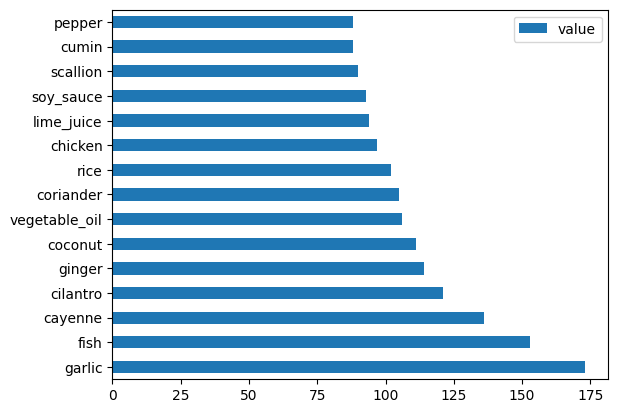

In [21]:
#plot and see the ingredients for the different cuisines
#Thai ingredient

thai_ingredient_df = create_ingredients(thai_df)
thai_ingredient_df.head(15).plot.barh()

<Axes: >

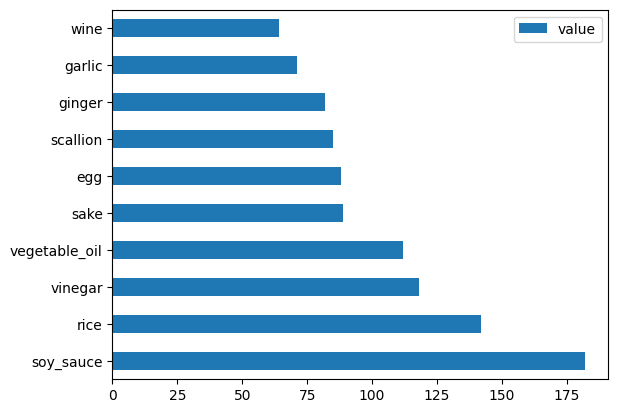

In [22]:
#japanese ingredients
japanese_ingredeints_df = create_ingredients(japanese)
japanese_ingredeints_df.head(10).plot.barh()

<Axes: >

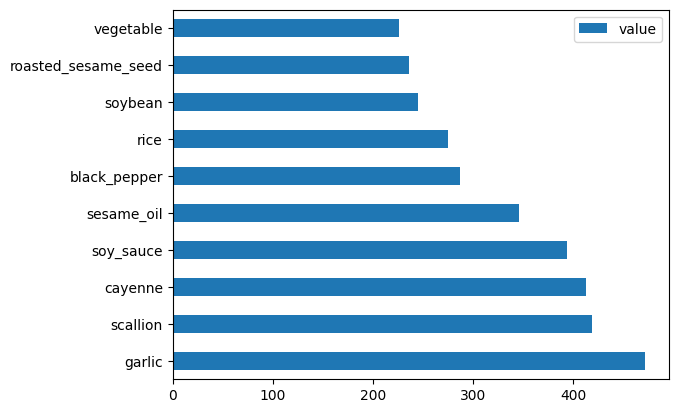

In [31]:
korean_ingredients_df = create_ingredients(korea_df)
korean_ingredients_df.head(10).plot.barh()

<Axes: >

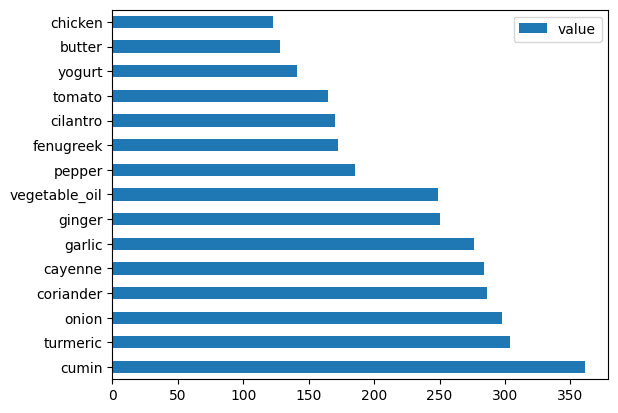

In [52]:
indian_ingredients_df = create_ingredients(indian_df)
indian_ingredients_df.head(15).plot.barh()

In [55]:
feature_df = df.drop(['cuisine', 'rice', 'garlic', 'Unnamed: 0', 'ginger'], axis=1)
label_df = df.cuisine
label_df

0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

#### Balance the dataset
- Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

- Call fit_resample(), this strategy generates new samples by interpolation.

In [57]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, label_df)

print(f'new label counts: {transformed_label_df.value_counts()}')
print(f'old label counts: {df.cuisine.value_counts()}')


new label counts: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label counts: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

In [59]:
#lets join the data
transformed_df = pd.concat([transformed_feature_df, transformed_label_df], axis=1, join='outer')
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, almond to cuisine
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [60]:
#saving it as a csv file
transformed_df.to_csv('cleaned_cuisine.csv')